In [1]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_roc_curve, classification_report, roc_auc_score

In [2]:
df = pd.read_csv(r"./data/bank_data.csv", index_col=0)
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
df.shape

(10127, 21)

In [4]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

numeric_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt',
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

## EDA

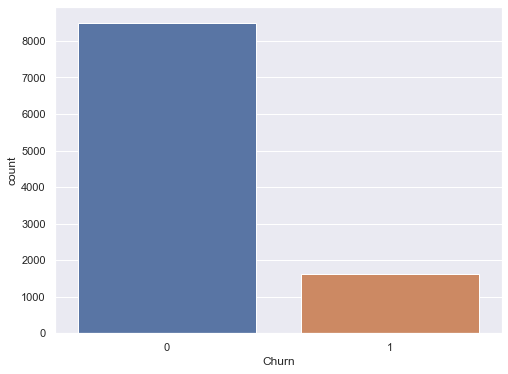

In [8]:
plt.figure(figsize=(8,6)) 
sns.countplot(x=df['Churn']);

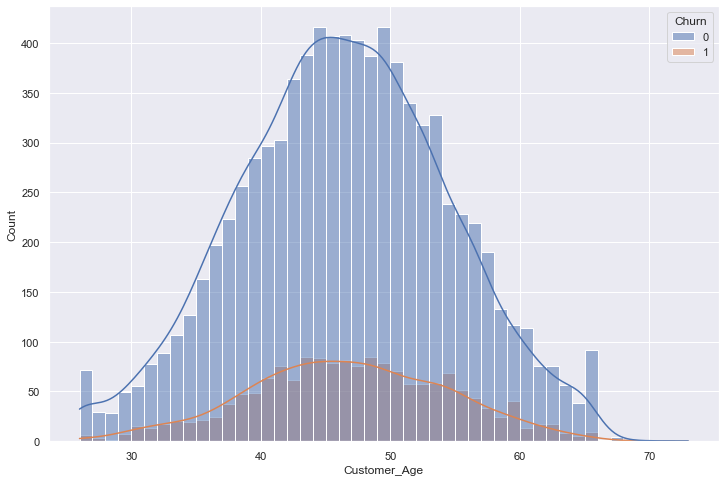

In [9]:
plt.figure(figsize=(12,8)); 
sns.histplot(x='Customer_Age', hue='Churn', kde=True, data=df);

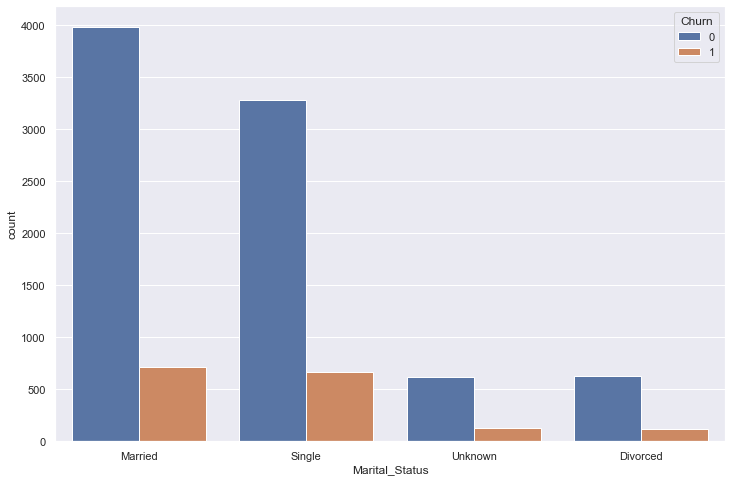

In [10]:
plt.figure(figsize=(12,8)) 
sns.countplot(x='Marital_Status', hue='Churn', data=df);

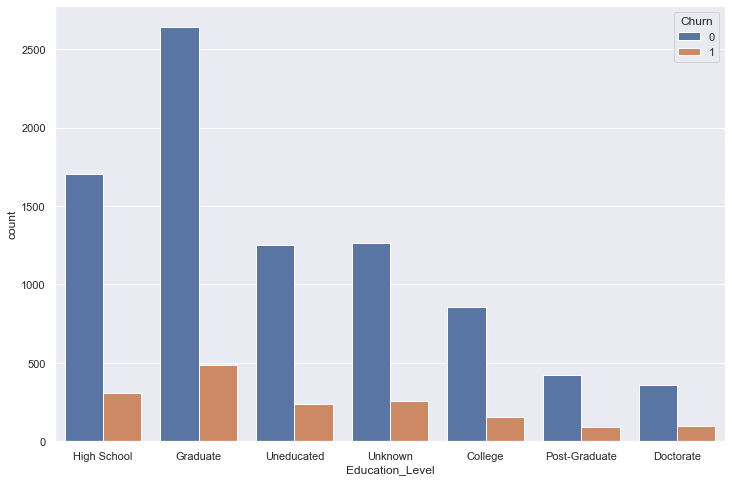

In [11]:
plt.figure(figsize=(12,8)) 
sns.countplot(x='Education_Level', hue='Churn', data=df);

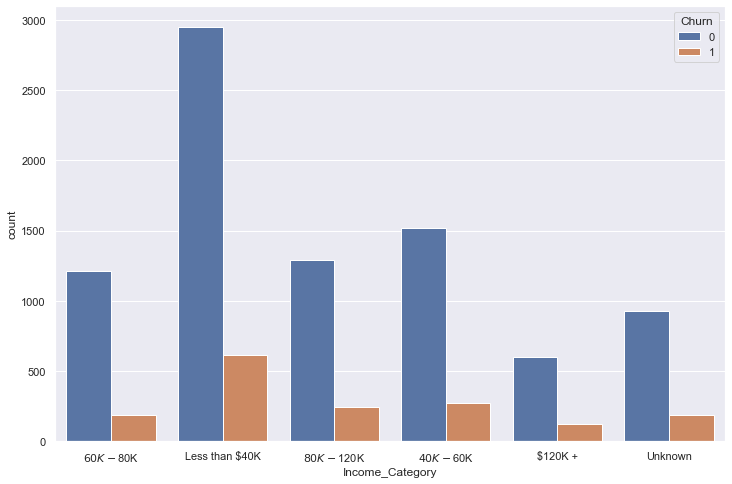

In [12]:
plt.figure(figsize=(12,8)) 
sns.countplot(x='Income_Category', hue='Churn', data=df);

In [13]:
plt.figure(figsize=(12,8)) 
sns.histplot(x='Total_Trans_Ct',  hue='Churn', kde=True, data=df);

In [14]:
plt.figure(figsize=(12,8)) 
sns.histplot(x='Total_Trans_Amt',  hue='Churn', kde=True, data=df);

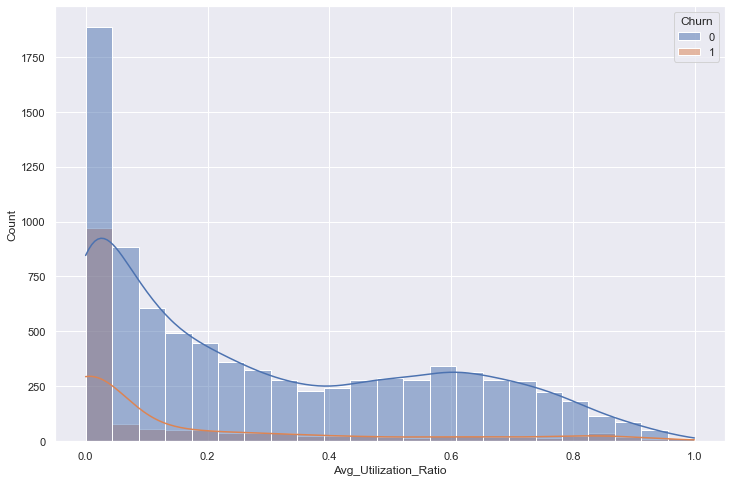

In [15]:
plt.figure(figsize=(12,8)) 
sns.histplot(x='Avg_Utilization_Ratio',  hue='Churn', kde=True, data=df);

In [16]:
sns.catplot(x='Marital_Status', y='Total_Trans_Ct', hue='Churn', kind='box', data=df, height=5, aspect=2);

In [17]:
sns.catplot(x='Marital_Status', y='Total_Trans_Ct', hue='Churn', row='Gender', kind='box', data=df, height=5, aspect=2);

In [18]:
sns.catplot(x='Marital_Status', y='Total_Trans_Amt', hue='Churn', kind='box', data=df, height=5, aspect=2);

In [19]:
sns.catplot(x='Marital_Status', y='Total_Trans_Amt', hue='Churn', row='Gender', kind='box', data=df, height=5, aspect=2);

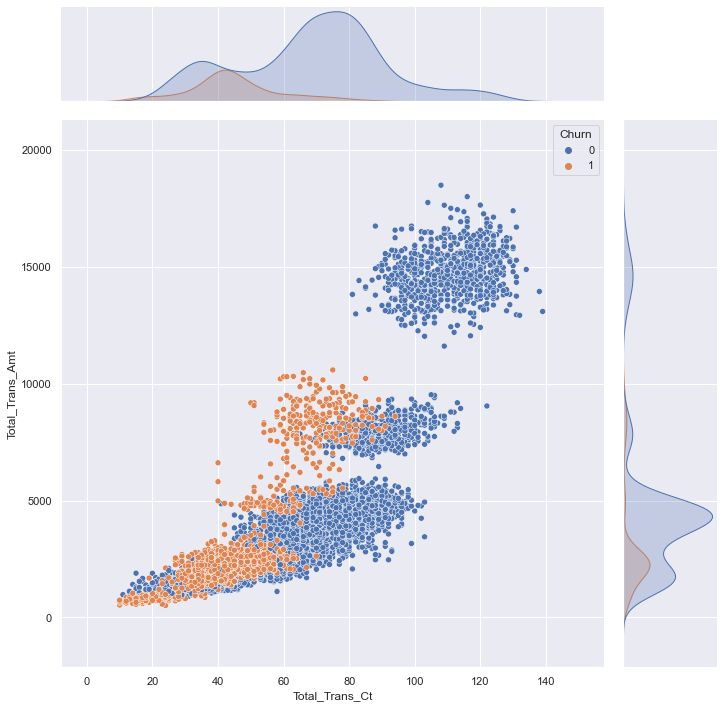

In [20]:
sns.jointplot(x="Total_Trans_Ct", y="Total_Trans_Amt", hue="Churn", data=df, height=10);

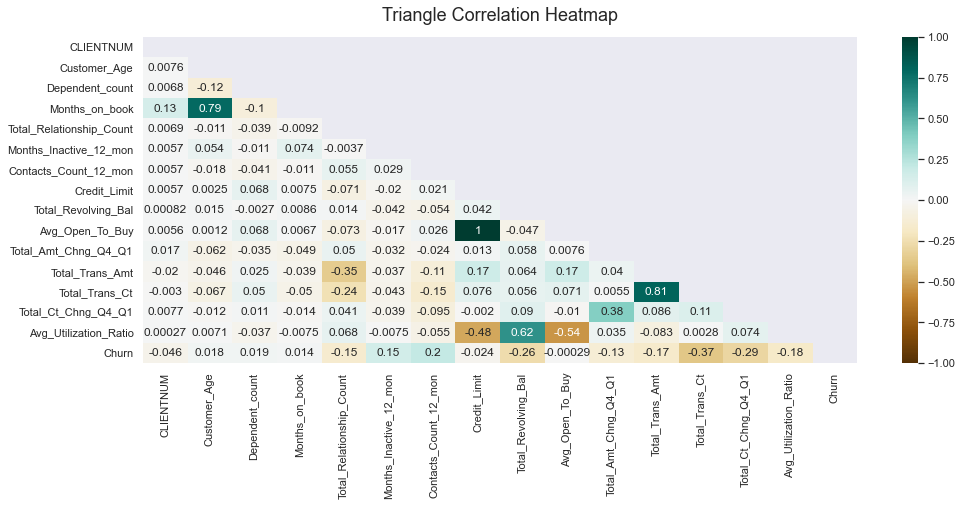

In [21]:
plt.figure(figsize=(16,6)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Data Cleaning

In [22]:
for col in cat_columns:
    mapping_dict = df.groupby(col).mean()['Churn']
    df[col] = df[col].map(mapping_dict)

In [23]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age    Gender  Dependent_count  \
0  768805383  Existing Customer            45  0.146152                3   
1  818770008  Existing Customer            49  0.173572                5   
2  713982108  Existing Customer            51  0.146152                3   
3  769911858  Existing Customer            40  0.173572                4   
4  709106358  Existing Customer            40  0.146152                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0         0.152012        0.151269         0.134807       0.160979   
1         0.155691        0.169414         0.171862       0.160979   
2         0.155691        0.151269         0.157655       0.160979   
3         0.152012        0.172230         0.171862       0.160979   
4         0.159381        0.151269         0.134807       0.160979   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Churn  
0                  0.061      0  
1                  0.105      0  
2                  0.000      0  
3                  0.760      0  
4                  0.000      0  

[5 rows x 22 columns]

## Feature Engineering and Data Segregation

In [24]:
df['Total_Trans_Ats'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

In [26]:
X = df.loc[:, cat_columns + numeric_columns]
y = df['Churn']

# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify=y, random_state=42)

print("X_train data shape:", X_train.shape)
print("y_train data shape:", y_train.shape)
print("X_test data shape:", X_test.shape)
print("y_test data shape:", y_test.shape)

X_train data shape: (7088, 19)
y_train data shape: (7088,)
X_test data shape: (3039, 19)
y_test data shape: (3039,)


## Modeling

In [27]:
# Random forest
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': list(range(50, 201, 50)),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : list(range(3, 7)),
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
cv_rfc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

# scores
print('Best parameters:', cv_rfc.best_params_)
print('Train ROC:', roc_auc_score(y_train, y_train_preds_rf))
print('Test ROC:', roc_auc_score(y_test, y_test_preds_rf))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 150}
Train ROC: 0.83993133912178
Test ROC: 0.798752980187776


In [28]:
# Random forest
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=42)

param_grid = { 
    'n_estimators': list(range(100, 201, 10)),
    'max_depth' : list(range(6, 13)),
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=3, verbose=1)
cv_rfc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

# scores
print('Best parameters:', cv_rfc.best_params_)
print('Train ROC:', roc_auc_score(y_train, y_train_preds_rf))
print('Test ROC:', roc_auc_score(y_test, y_test_preds_rf))

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best parameters: {'max_depth': 12, 'n_estimators': 180}
Train ROC: 0.9860553805975314
Test ROC: 0.8897009208860556


In [29]:
# Random forest
rfc = RandomForestClassifier(n_estimators=180, criterion='entropy', max_features='auto', random_state=42)

param_grid = { 
    'max_depth' : list(range(12, 17)),
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=3, verbose=1)
cv_rfc.fit(X_train, y_train)

y_train_preds_rf = cv_rfc.best_estimator_.predict(X_train)
y_test_preds_rf = cv_rfc.best_estimator_.predict(X_test)

# scores
print('Best parameters:', cv_rfc.best_params_)
print('Train ROC:', roc_auc_score(y_train, y_train_preds_rf))
print('Test ROC:', roc_auc_score(y_test, y_test_preds_rf))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'max_depth': 13}
Train ROC: 0.9925373134328358
Test ROC: 0.8933626960818966


In [30]:
# Logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lrc = LogisticRegression(random_state=42)
lrc.fit(X_train_scaled, y_train)

y_train_preds_lr = lrc.predict(X_train_scaled)
y_test_preds_lr = lrc.predict(X_test_scaled)

# scores
print('Train ROC:', roc_auc_score(y_train, y_train_preds_lr))
print('Test ROC:', roc_auc_score(y_test, y_test_preds_lr))

Train ROC: 0.7774574518466963
Test ROC: 0.7591952047091787


In [31]:
print('Random Forest Results')
print('Test Results')
print(classification_report(y_test, y_test_preds_rf))
print('Train Results')
print(classification_report(y_train, y_train_preds_rf))

Random Forest Results
Test Results
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.91      0.80      0.85       488

    accuracy                           0.96      3039
   macro avg       0.94      0.89      0.91      3039
weighted avg       0.95      0.96      0.95      3039

Train Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      0.99      0.99      1139

    accuracy                           1.00      7088
   macro avg       1.00      0.99      1.00      7088
weighted avg       1.00      1.00      1.00      7088



In [32]:
print('Logistic Regression results')
print('Test Results')
print(classification_report(y_test, y_test_preds_lr))
print('Train Results')
print(classification_report(y_train, y_train_preds_lr))

Logistic Regression results
Test Results
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2551
           1       0.75      0.55      0.64       488

    accuracy                           0.90      3039
   macro avg       0.84      0.76      0.79      3039
weighted avg       0.89      0.90      0.89      3039

Train Results
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5949
           1       0.78      0.59      0.67      1139

    accuracy                           0.91      7088
   macro avg       0.85      0.78      0.81      7088
weighted avg       0.90      0.91      0.90      7088



In [33]:
# save best model
joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
joblib.dump(lrc, './models/logistic_model.pkl')

['./models/logistic_model.pkl']

In [34]:
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')

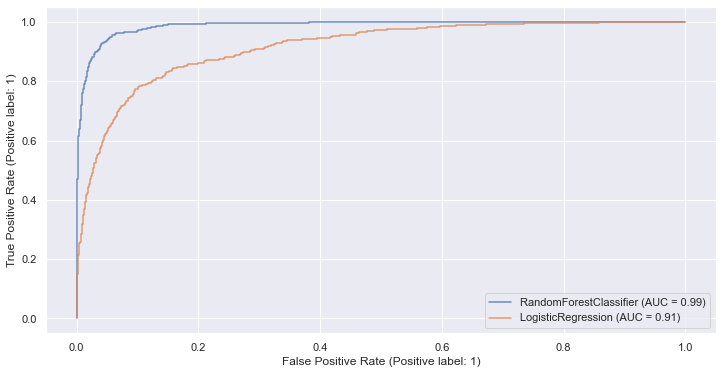

In [35]:
# roc curve for models
plt.figure(figsize=(12, 6))
ax = plt.gca()

plot_roc_curve(cv_rfc.best_estimator_, X_test, y_test, ax=ax, alpha=0.8)
plot_roc_curve(lrc, X_test_scaled, y_test, ax=ax, alpha=0.8);

In [36]:
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

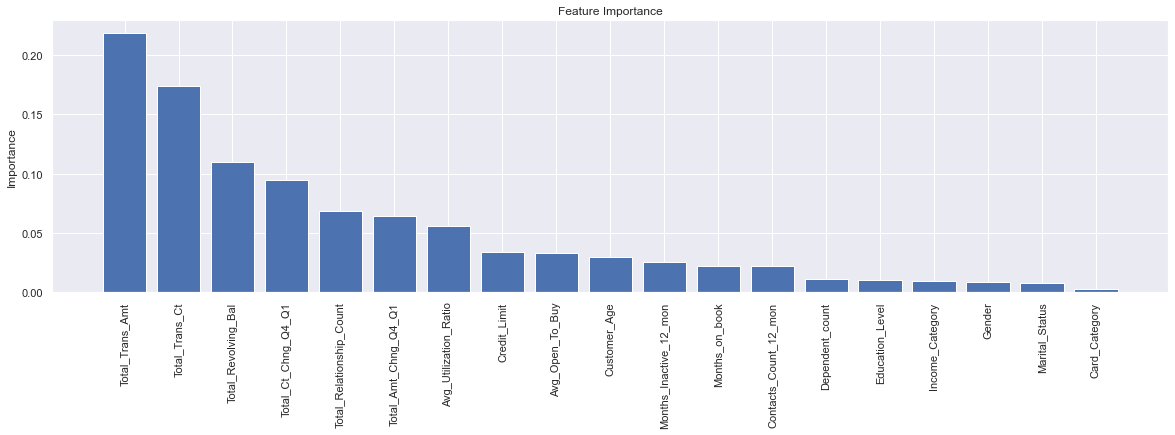

In [37]:
# Calculate feature importances
importances = cv_rfc.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,5))

# Create plot title
plt.title("Feature Importance")
plt.ylabel('Importance')

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90);

In [38]:
plt.rc('figure', figsize=(5, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 1.25, str('Random Forest Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_test, y_test_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Random Forest Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_train, y_train_preds_rf)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');

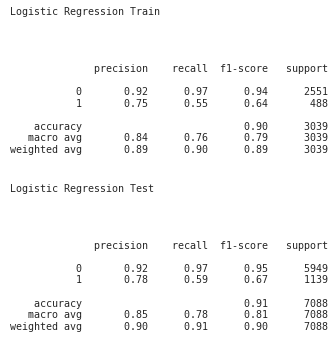

In [39]:
plt.rc('figure', figsize=(5, 5))
plt.text(0.01, 1.25, str('Logistic Regression Train'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.05, str(classification_report(y_train, y_train_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.text(0.01, 0.6, str('Logistic Regression Test'), {'fontsize': 10}, fontproperties = 'monospace')
plt.text(0.01, 0.7, str(classification_report(y_test, y_test_preds_lr)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off');